# Exploratory Data Analysis on UFC Metrics

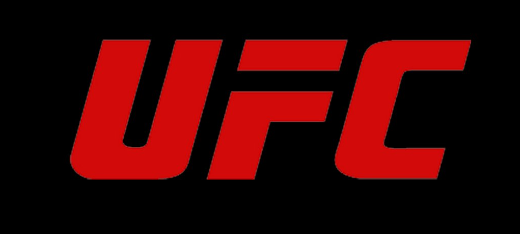
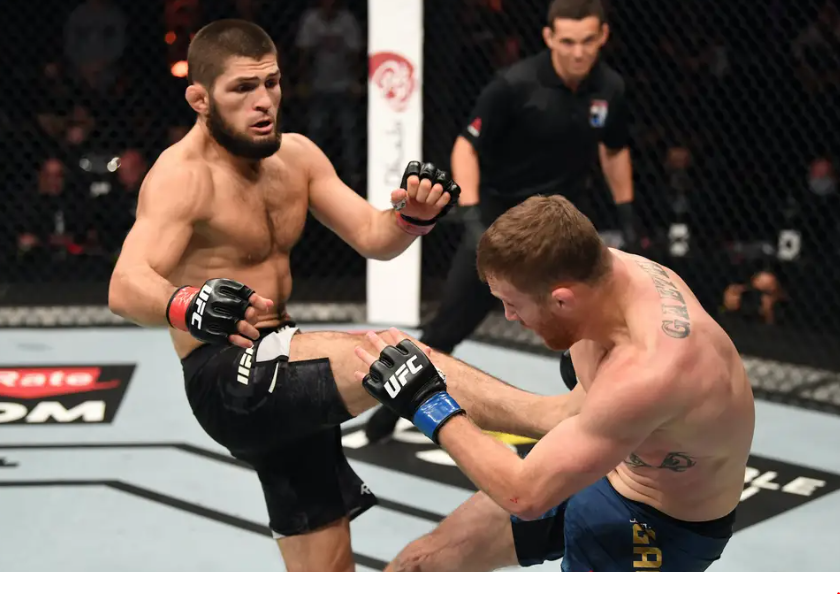

## Introduction
The Ultimate Fighting Championship (UFC) is an American mixed martial arts organization based in Las Vegas, USA and is regarded as the largest mix martial arts (MMA) promotion. MMA is comprised of all styles of fighting such as boxing, kickboxing, grappling, and jiu jitsu. It's a sport that's highly unpredictable given the nature of fighting but I'd like to understand the following:

1. Does age play a factor in winning?
2. How does the fighter's height affect performance?
3. In what parts of the world is MMA most popular? And what fighting style originates from what part of the world?
4. What is the most popular way to win a fight?

## Lets load, understand, and clean our data

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [40]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('UFC Metrics.csv')
df

 # Understanding the Data:
    
This dataset contains a list of all UFC fights since 2013 up until now . Each row represents a single fight - with each fighter's previous records summed up prior to the fight. Blank stats would mean that it's the fighter's first fight since 2013 which is where granular data for UFC fights.

Important Columns:
- BPrev: Previous fights by 'Blue' fighter
- B_Age: Age of 'Blue' fighter
- B_Height: Height of 'Blue' fighter
- B_Weight: Weight of 'Blue' fighter
- B_Location: Location of 'Blue' fighter
- B_Hometown: Hometown of 'Blue fighter
- RPrev: Previous fights by 'Red' fighter
- R_Age: Age of 'Red' fighter
- R_Height: Height of 'Red' fighter
- R_Weight: Weight of 'Red' fighter
- R_Location: Location of 'Red' fighter
- R_Hometown: Hometown of 'Red fighter
- Date: Date of the fight
- winby: How did the fighter win the fight (decision, submission KO etc.)
- winner: Who was the winner of the fight?


In [15]:
#Lets take a closer look at our data
df.describe(include ="all")

BPrev      BStreak        B_Age     B_Height  \
count   1477.000000  1477.000000  1474.000000  1476.000000   
unique          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN   
mean       1.735274     0.654705    30.954545   177.451220   
std        1.895561     1.057269     4.020311     8.561541   
min        0.000000     0.000000    20.000000   152.000000   
25%        0.000000     0.000000    28.000000   172.000000   
50%        1.000000     0.000000    31.000000   177.000000   
75%        3.000000     1.000000    34.000000   182.000000   
max       11.000000     7.000000    46.000000   213.000000   

                   B_HomeTown         B_ID             B_Location     B_Name  \
count                    1471  1477.000000                   1470       1477   
unique                    568          NaN                    431        719   
top     Rio de Janeiro Brazil          NaN  Rio de Janeiro Brazil  Tim Means   
freq                       32          NaN                     38          8   
mean                      NaN  1964.633040                    NaN        NaN   
std                       NaN   666.949141                    NaN        NaN   
min                       NaN   129.000000                    NaN        NaN   
25%                       NaN  1755.000000                    NaN        NaN   
50%                       NaN  2156.000000                    NaN        NaN   
75%                       NaN  2337.000000                    NaN        NaN   
max                       NaN  2882.000000                    NaN        NaN   

           B_Weight  B__Round1_Grappling_Reversals_Landed  \
count   1477.000000                            978.000000   
unique          NaN                                   NaN   
top             NaN                                   NaN   
freq            NaN                                   NaN   
mean      73.804333                              0.036810   
std       14.980531                              0.193748   
min       52.000000                              0.000000   
25%       65.000000                              0.000000   
50%       70.000000                              0.000000   
75%       84.000000                              0.000000   
max      120.000000                              2.000000   

        B__Round1_Grappling_Standups_Landed  \
count                            978.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               0.896728   
std                                1.255722   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                1.000000   
max                                9.000000   

        B__Round1_Grappling_Submissions_Attempts  \
count                                 978.000000   
unique                                       NaN   
top                                          NaN   
freq                                         NaN   
mean                                    0.431493   
std                                     0.830527   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                     6.000000   

        B__Round1_Grappling_Takedowns_Attempts  \
count                               978.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                  2.986708   
std                                   3.987291   
min                                

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [19]:
df.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,1471,1470,1477,1477,1477,1476,1477,1461,1477
unique,568,431,719,224,495,390,633,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Tim Means,07/11/2016,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,32,38,8,32,44,67,11,720,867


## Interesting Initial Observations 
1. The most common hometown is Rio de Janeiro, Brazil. This makes sense considering MMA is one of the biggest sports on Brazil, behind football of course.
2. 'Red' Fighter won more fights, (867/1477) about 59% of fights. This generally makes sense considering the 'red' fighter is usually a higher rank.
3. Most fights were also won via Decision.
4. Most fights were in 2016.

In [7]:
#Cleaning our data
pd.set_option('display.max_rows', 10)
df.isnull().sum()

NameError: name 'df' is not defined

# Missing Values
As we can see above, we have several null values. The missing values that are pertinent are for columns age and height. To maximize the amount of data we have, instead of deleting the rows with null values for age and height, we can replace it with median values. 

In [29]:
#Blue Fighter
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))

#Red Fighter
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

In [30]:
#Checking that there are no null values
df[['B_Age','B_Height','R_Age','R_Height']].isnull().sum()

B_Age       0
B_Height    0
R_Age       0
R_Height    0
dtype: int64

# Mission Statement: What are we trying to accomplish?
I'd like to gain a better understanding to the following questions
1. Which corner usually gets more victories? (Red/Blue)
2. How does Age and Height have an affect on the result of the fight?
3. What is the most common way of winning a fight?
4. What is the most popular training location for fighters?
5. Analyzing different techniques used in different rounds?
6. How dominant are the famous 'Dagestani' fighters?

# Which corner usually gets more victories? (Red/Blue)

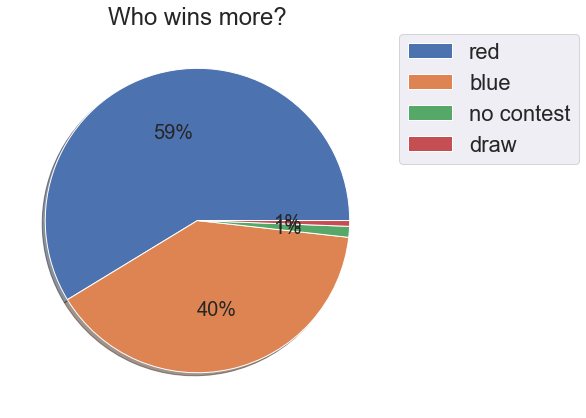

In [126]:
from matplotlib import pyplot as plt
data = df['winner'].value_counts()
ax = data.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%', shadow = True, legend=True, title='Who wins more?', ylabel ='', labeldistance=None, fontsize=20)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# How does age influence winning?

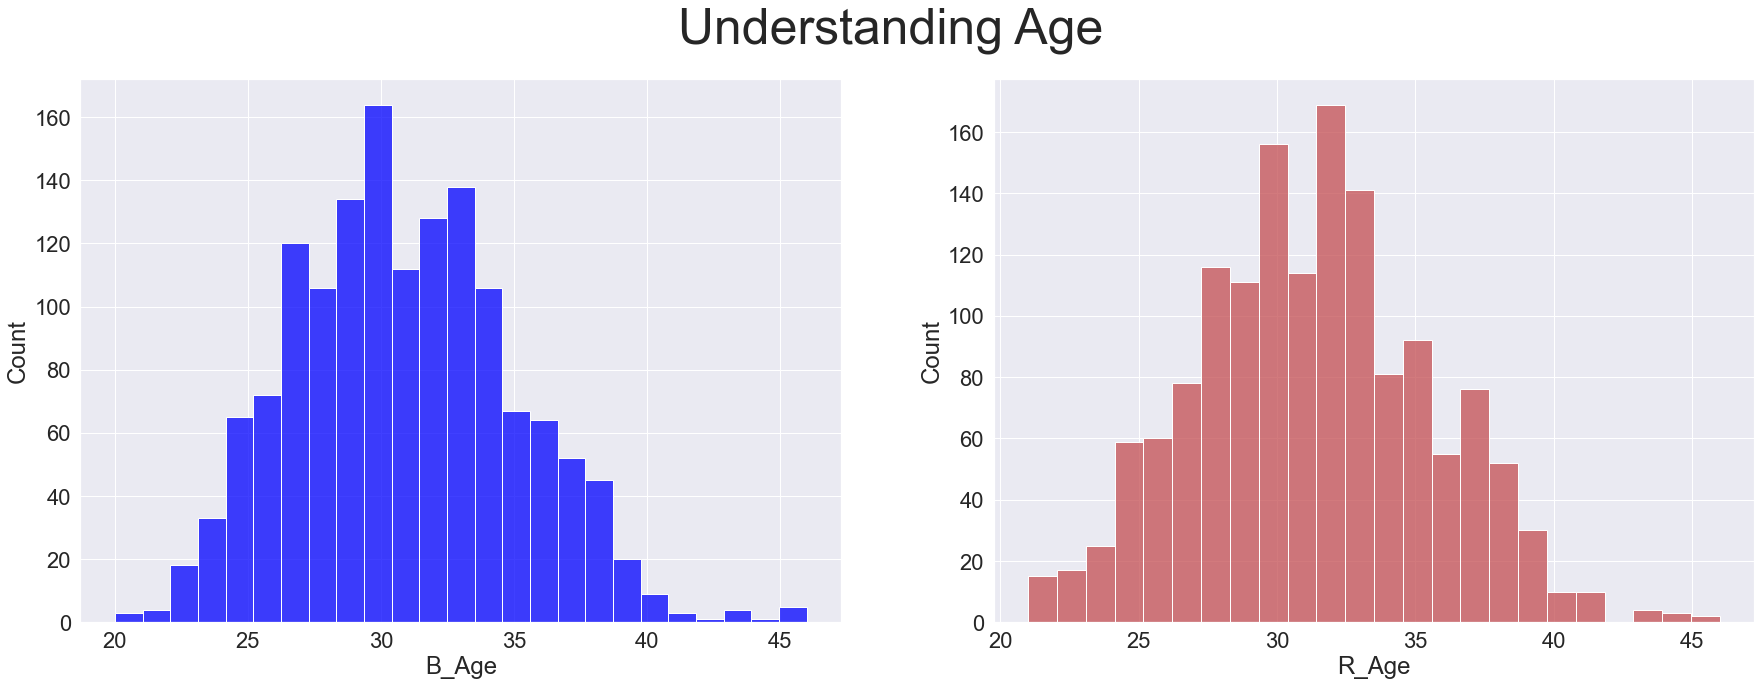

In [127]:
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.histplot(df['B_Age'], ax=ax[0], color ='blue' )
sns.histplot(df['R_Age'], ax=ax[1], color ='r' )
plt.suptitle("Understanding Age",fontsize=50)
sns.set(font_scale =2)
plt.show()

 Text about why age is important

In [128]:
print('The Mean age for blue fighters is', df['B_Age'][df['winner'] == 'blue'].mean())
print('The Mean age for red fighters is', df['R_Age'][df['winner'] == 'red'].mean())
print('Regardless  ')

The Mean age for blue fighters is 30.237113402061855
The Mean age for red fighters is 31.147635524798154
Regardless  


# How does height influence winning?

Height needs to be broken down by weight division, these are the UFC weight divisions & their respective weights

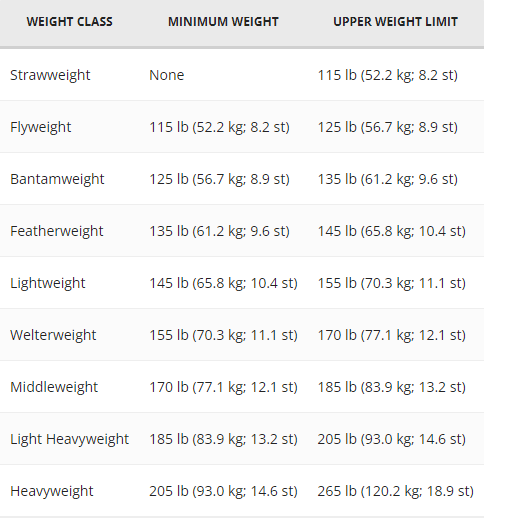

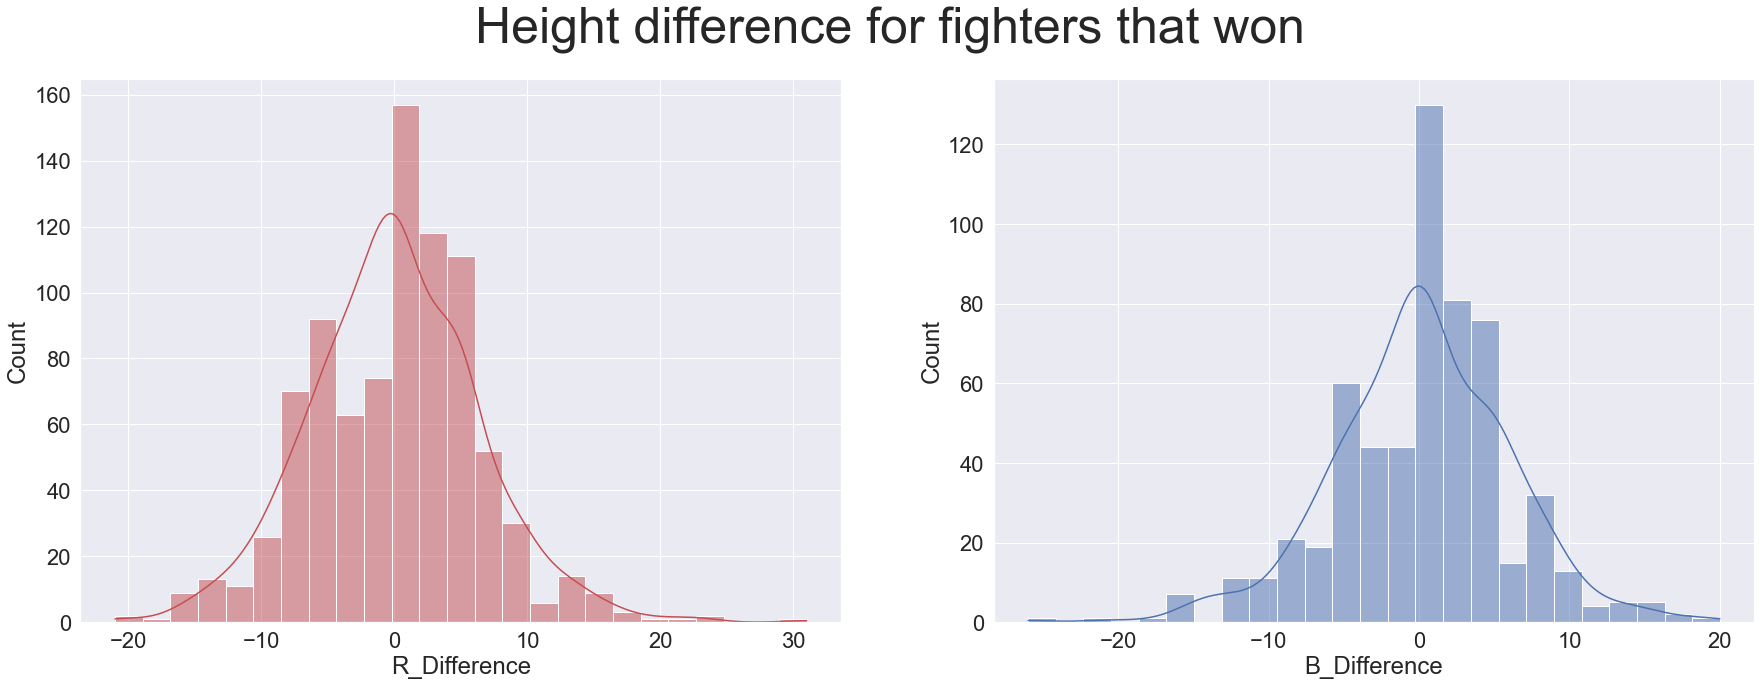

In [129]:
redwinners = df[["B_Height", "R_Height", "winner"]][df['winner'] == 'red']
redwinners['R_Difference'] = redwinners['R_Height'] - redwinners['B_Height']

bluewinners = df[["B_Height", "R_Height", "winner"]][df['winner'] == 'blue']
bluewinners['B_Difference'] = bluewinners['B_Height'] - bluewinners['R_Height']

fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.histplot(redwinners['R_Difference'],ax=ax[0], color ='r', kde = True)
sns.histplot(bluewinners['B_Difference'],ax=ax[1], color ='b', kde = True)
plt.suptitle("Height difference for fighters that won", fontsize =50)
plt.show()

The above histograms look at the height difference for fighters that won (both blue and red corners). As expected the mean value is closer to 0. This makes sense because fighters must fight in the same weight division and won't vary too much in height. However, one can see here that the fighters that won generally have a height advantage. A height advantage means that the fighter likely has a greater reach which can help the fighter keep distance.

# Most common way of winning a fight¶
Now, let's talk about how the fighters are winning. The three most popular ways to win in an MMA fight are:
1. DEC: Decision (Dec) is a result of the fight or bout that does not end in a knockout in which the judges' scorecards are consulted to determine the winner; a majority of judges must agree on a result. A fight can either end in a win for an athlete, a draw, or a no decision.
2. SUB: also referred to as a "submission" or "tap out" - is often performed by visibly tapping the floor or the opponent with the hand or in some cases with the foot, to signal the opponent and/or the referee of the submission
3. KO/TKO: Knockout (KO) is when a fighter gets knocked out cold. (i.e.. From a standing to not standing position from receiving a strike.). Technical Knockout (TKO) is when a fighter is getting pummeled and is unable to defend him/herself further. The referee will step in and make a judgement call to end it and prevent the fighter from receiving any more unnecessary or permanent damage, and call it a TKO

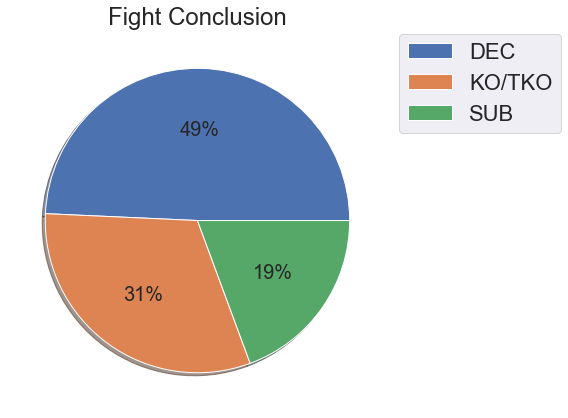

In [131]:
winby = df['winby'].value_counts()
ax = winby.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%', shadow = True, legend=True, title='Fight Conclusion', ylabel ='', labeldistance=None, fontsize=20)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

C:\Users\umerghani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:806: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  func(*plot_args, **plot_kwargs)


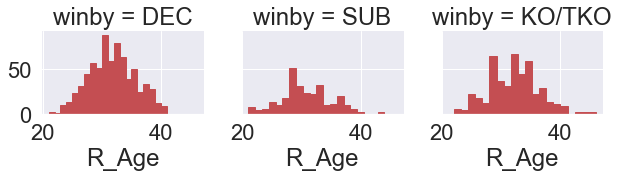

In [136]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20,COLOR='r')


C:\Users\umerghani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:806: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  func(*plot_args, **plot_kwargs)


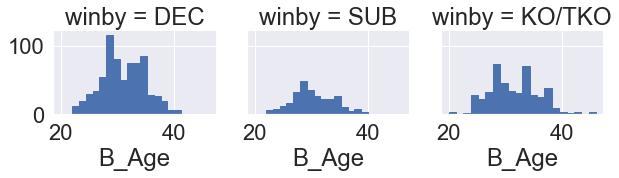

In [138]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'B_Age', bins=20,COLOR='b')

as seen here, one thing consistent accross both blue and red fighters, is that most fighters aged 20-27 are winning by decision. This makes sense considering they lack experience in executing KO's and submissions

<AxesSubplot:title={'center':'Hometowns for Blue Fighters'}>

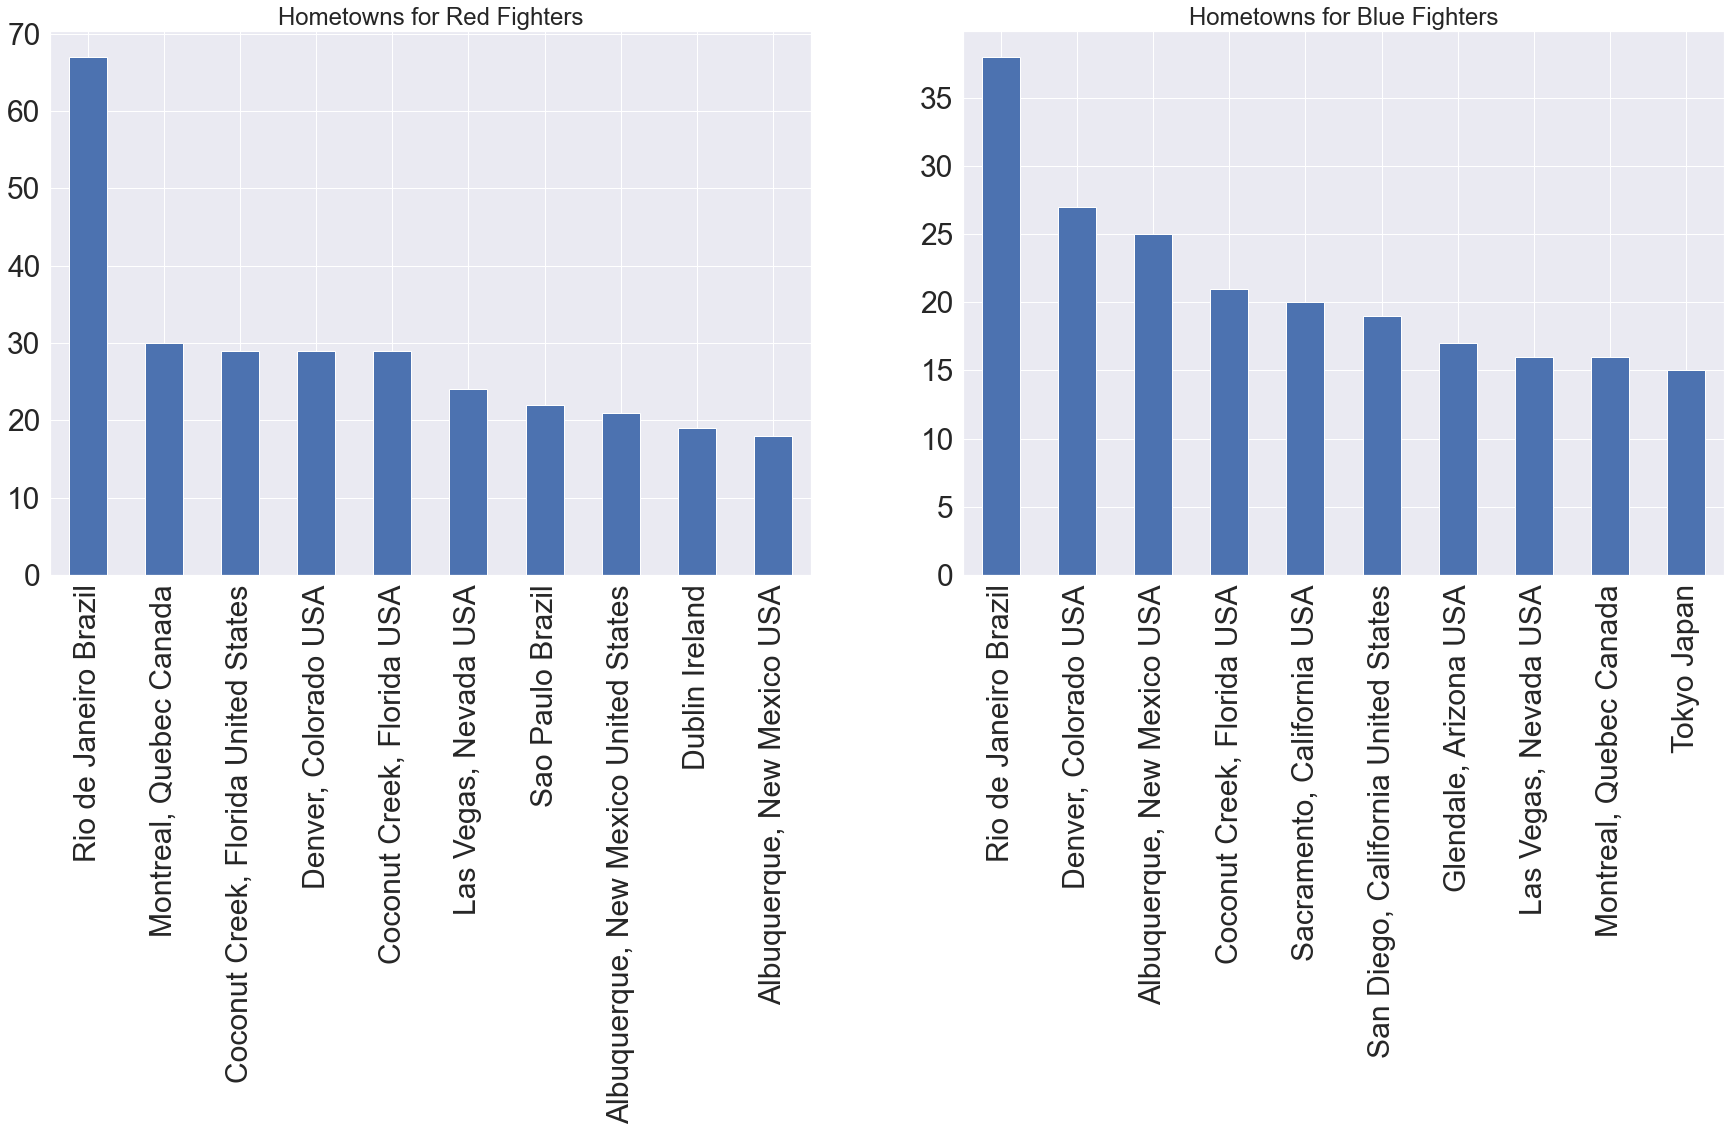

In [175]:
RedFLocation = df['R_Location'].value_counts().head(10)
BlueFLocation = df['B_Location'].value_counts().head(10)
fig, ax = plt.subplots(1,2, figsize=(30,10))
RedFLocation.plot(kind ='bar',  ax = ax[0], title ='Hometowns for Red Fighters', fontsize = 30,)
BlueFLocation.plot(kind ='bar', ax = ax[1], title ='Hometowns for Blue Fighters', fontsize = 30,)


In [176]:
# For both red and blue, most fighters originate out of Brazil. Makes sense, consistnent with Brazilian sports.

In [192]:
x = df[df['B_HomeTown'] == 'Dagestan Russia']
x = x[['B__Round1_Grappling_Takedowns_Attempts','B__Round1_Grappling_Submissions_Attempts']]
x.plot(kind='scatter', figsize=(18,9))

ValueError: scatter requires an x and y column